In [9]:
!pip install pyportfolioopt


  Using cached pyportfolioopt-1.5.5-py3-none-any.whl (61 kB)
  Obtaining dependency information for cvxpy<2.0.0,>=1.1.19 from https://files.pythonhosted.org/packages/c2/8d/57a601819a720b4999017ad614f16fa87a0b8a53d0d28ede273d390f30e9/cvxpy-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for osqp>=0.4.1 from https://files.pythonhosted.org/packages/23/46/232041be3d85624ec4c20b3bdb8bd4bfb6640851901db155917e0c412aef/osqp-0.6.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/72.0 kB ? eta -:--:--
     ---------------------------------------- 72.0/72.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
     - -------------------------------------- 0.3/8.2 MB 10.6 MB/s eta 0:00:01
     ---- ----------------------------------- 0.8/8.2 MB 10.8 MB/s eta 0:00:01
     ------ --------------------------------- 1.4/8.2 MB 11.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.9/8

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import objective_functions

In [11]:
def get_optimal_weights(exp_returns: pd.Series, exp_cov:pd.DataFrame, vol_limit: float = None):
  ef = EfficientFrontier(exp_returns, exp_cov)
  if vol_limit is not None:
    weights = ef.efficient_risk(vol_limit)
  # If vol limit not specified, default to maximising return risk ratio
  else:
    weights = ef.nonconvex_objective(
            objective_functions.sharpe_ratio,
            objective_args=(ef.expected_returns, ef.cov_matrix),
        )
  return pd.Series(weights)

In [12]:
returns = pd.read_csv("base_returns.csv")

In [13]:
start_date = '2013-01-01'
end_date = '2019-01-01'

In [14]:
returns = returns.iloc[:, :-1]

In [18]:
returns.set_index("Date", inplace=True)

In [19]:
returns.dtypes

AAPL     float64
MSFT     float64
GOOG     float64
GOOGL    float64
AMZN     float64
NVDA     float64
TSLA     float64
META     float64
HSBC     float64
LLY      float64
TSM      float64
V        float64
UNH      float64
XOM      float64
JPM      float64
WMT      float64
NVO      float64
JNJ      float64
dtype: object

In [20]:
# Returns dataframe of expected returns as the mean of the past [window] days
def get_predicted_returns(window: int):
  return returns.rolling(window).mean().shift(1)['2018-01-01':]

# Returns multiindex dataframe where first level index is date, value is dataframe of covariance matrix calculated by past [window] number of days
def get_predicted_covariance(window:int):
  return returns.rolling(window).cov().unstack().shift(1).stack().query("Date > '2018-01-01'")

# def get_predicted_covariance(window: int):
#     numeric_returns = returns.select_dtypes(include='number')
#     # Calculate the rolling covariance matrix
#     rolling_cov = returns.rolling(window).cov()
#     print("no error in rolling cov")

#     # Shift the rolling covariance matrix by 1 day
#     shifted_cov = rolling_cov.groupby(level=0).shift(1)

#     # Filter by date
#     filtered_cov = shifted_cov.loc['2018-01-01':]

#     return filtered_cov

In [21]:
exp_return= get_predicted_returns(30)
exp_cov = get_predicted_covariance(252)

In [22]:
exp_return.head()

,AAPL,MSFT,GOOG,GOOGL,AMZN,NVDA,TSLA,META,HSBC,LLY,TSM,V,UNH,XOM,JPM,WMT,NVO,JNJ
Date,,,,,,,,,,,,,,,,,,
2018-01-02,0.000030,0.001013,0.000822,0.000542,0.001242,-0.002701,0.000005,-0.000280,0.002139,0.000908,-0.001552,0.001180,0.001755,0.000983,0.002845,0.003331,0.002582,0.000352
2018-01-03,0.000225,0.001084,0.001033,0.000777,0.001482,-0.001966,0.000846,0.000338,0.002743,0.000492,-0.000866,0.001032,0.001659,0.001800,0.003064,-0.000171,0.002332,0.000290
2018-01-04,0.000405,0.001561,0.002011,0.001744,0.002123,0.000198,0.000232,0.001039,0.002570,0.000893,-0.000286,0.001724,0.002202,0.002581,0.003210,0.000846,0.002381,0.000816
2018-01-05,0.000593,0.001800,0.002155,0.001913,0.002378,-0.000053,0.000629,0.001027,0.002599,0.000925,-0.000573,0.001808,0.002291,0.002499,0.003390,0.000872,0.001927,0.000831
2018-01-08,0.000356,0.001734,0.002114,0.001852,0.002524,-0.000077,-0.000129,0.000902,0.002535,0.001200,-0.000094,0.002146,0.002550,0.002340,0.003202,0.001399,0.001872,0.001006


In [23]:
exp_cov.head()

AAPL      MSFT      GOOG     GOOGL      AMZN      NVDA  \
Date                                                                           
2018-01-02 AAPL   0.000122  0.000046  0.000053  0.000051  0.000074  0.000101   
           AMZN   0.000074  0.000075  0.000085  0.000082  0.000168  0.000103   
           GOOG   0.000053  0.000056  0.000095  0.000093  0.000085  0.000090   
           GOOGL  0.000051  0.000054  0.000093  0.000093  0.000082  0.000090   
           HSBC   0.000018  0.000012  0.000007  0.000007  0.000006  0.000021   

                      TSLA      META      HSBC           LLY       TSM  \
Date                                                                     
2018-01-02 AAPL   0.000066  0.000065  0.000018 -5.374100e-07  0.000058   
           AMZN   0.000062  0.000092  0.000006  5.054240e-06  0.000048   
           GOOG   0.000053  0.000074  0.000007  1.079876e-05  0.000045   
           GOOGL  0.000050  0.000073  0.000007  1.125956e-05  0.000043   
           HSBC  -0.000005  0.000012  0.000083  6.884622e-06  0.000017   

                         V       UNH           XOM       JPM       WMT  \
Date                                                                     
2018-01-02 AAPL   0.000034  0.000019  4.368169e-06  0.000023  0.000012   
           AMZN   0.000035  0.000022  1.382325e-06  0.000002 -0.000003   
           GOOG   0.000041  0.000017  7.737341e-07  0.000014  0.000002   
           GOOGL  0.000040  0.000017  8.591826e-07  0.000013  0.000003   
           HSBC   0.000015  0.000005  1.192406e-05  0.000039 -0.000005   

                       NVO       JNJ  
Date                                  
2018-01-02 AAPL   0.000021  0.000003  
           AMZN   0.000026  0.000005  
           GOOG   0.000024  0.000010  
           GOOGL  0.000022  0.000010  
           HSBC   0.000013  0.000002

In [24]:
optimal_weights = exp_return.apply(lambda x: get_optimal_weights(x, exp_cov.loc[x.name].reset_index(level=0, drop=True)), axis=1)


In [25]:
portfolio_returns = (optimal_weights * returns).dropna().sum(axis=1)

In [26]:
portfolio_returns.head()

Date
2018-01-02    0.032224
2018-01-03    0.036196
2018-01-04   -0.000693
2018-01-05    0.016712
2018-01-08    0.012584
dtype: float64

In [27]:
portfolio_returns.to_csv("baseline_return.csv")

In [41]:
ml_exp_cov = pd.read_csv("cov_forecast.csv")

In [42]:
ml_exp_cov.rename(columns={'Unnamed: 1': 'ticker'}, inplace=True)

In [43]:
ml_exp_cov.columns

Index(['Date', 'ticker', 'AAPL', 'MSFT', 'GOOG', 'GOOGL', 'AMZN', 'NVDA',
       'TSLA', 'META', 'HSBC', 'LLY', 'TSM', 'V', 'UNH', 'XOM', 'JPM', 'WMT',
       'NVO', 'JNJ'],
      dtype='object')

In [48]:
ml_exp_cov.set_index(["Date", "ticker"], inplace=True)

In [49]:
ml_exp_return = pd.read_csv("LSTM_total_predicted_returns.csv").set_index("Date").sort_index(axis=1)

In [50]:
ml_exp_cov.head()


AAPL      MSFT      GOOG     GOOGL      AMZN      NVDA  \
Date       ticker                                                               
2018-01-02 AAPL    0.000163  0.000061  0.000090  0.000087  0.000111  0.000175   
           MSFT    0.000061  0.000141  0.000075  0.000074  0.000099  0.000160   
           GOOG    0.000090  0.000075  0.000127  0.000124  0.000132  0.000180   
           GOOGL   0.000087  0.000074  0.000124  0.000124  0.000131  0.000178   
           AMZN    0.000111  0.000099  0.000132  0.000131  0.000240  0.000271   

                       TSLA      META      HSBC       LLY       TSM         V  \
Date       ticker                                                               
2018-01-02 AAPL    0.000154  0.000117  0.000032  0.000015  0.000103  0.000056   
           MSFT    0.000141  0.000092  0.000001  0.000014  0.000032  0.000090   
           GOOG    0.000131  0.000131 -0.000003  0.000013  0.000047  0.000073   
           GOOGL   0.000117  0.000132 -0.000003  0.000018  0.000044  0.000071   
           AMZN    0.000132  0.000176  0.000004  0.000016  0.000078  0.000113   

                        UNH       XOM       JPM       WMT       NVO       JNJ  
Date       ticker                                                              
2018-01-02 AAPL    0.000013  0.000029 -0.000007  0.000022  0.000054 -0.000007  
           MSFT    0.000046  0.000003 -0.000006  0.000002  0.000088  0.000054  
           GOOG   -0.000007 -0.000007 -0.000036  0.000023  0.000038  0.000010  
           GOOGL  -0.000007 -0.000008 -0.000042  0.000026  0.000035  0.000009  
           AMZN    0.000021  0.000005 -0.000059  0.000025  0.000085  0.000017

In [54]:
del ml_exp_return['Unnamed: 0']

In [55]:
ml_exp_return

,AAPL,AMZN,GOOG,GOOGL,HSBC,JNJ,JPM,LLY,META,MSFT,NVDA,NVO,TSLA,TSM,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,
2018-01-02,0.505889,1.116622,0.511192,0.633493,0.481816,1.187479,1.276625,1.450552,1.822086,1.013067,0.387131,0.400482,0.585421,0.405146,2.294138,1.294258,0.851292,0.621484
2018-01-03,0.506011,1.115542,0.512316,0.631531,0.481994,1.187405,1.275808,1.449007,1.822086,1.012728,0.387053,0.400483,0.583733,0.405186,2.294166,1.294105,0.850694,0.624629
2018-01-04,0.506570,1.115245,0.510768,0.629246,0.482068,1.187378,1.275521,1.448271,1.822086,1.012687,0.387071,0.400508,0.582224,0.405329,2.294266,1.294041,0.851775,0.626881
2018-01-05,0.506658,1.114246,0.506848,0.628038,0.481276,1.187370,1.276259,1.442085,1.822086,1.012696,0.387092,0.400309,0.581937,0.405153,2.294626,1.293972,0.853269,0.630076
2018-01-08,0.507224,1.116062,0.510714,0.629064,0.481733,1.187713,1.275959,1.441783,1.822086,1.012563,0.386907,0.400484,0.580866,0.405125,2.295369,1.294471,0.854592,0.633020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,0.507017,1.114677,0.487627,0.684076,0.481059,1.187132,1.273794,1.443397,1.822086,1.012886,0.390519,0.400016,0.720744,0.404957,2.328972,1.293092,0.844945,0.922193
2018-12-26,0.507593,1.111705,0.483614,0.685611,0.480850,1.187102,1.272514,1.445079,1.822086,1.012709,0.390622,0.399865,0.719267,0.404556,2.330931,1.292784,0.844872,0.928911
2018-12-27,0.508079,1.113112,0.485190,0.679355,0.480990,1.187556,1.273991,1.445903,1.822086,1.012827,0.390542,0.399684,0.724933,0.405026,2.332260,1.293167,0.845412,0.934888


In [56]:
ml_exp_cov

AAPL      MSFT      GOOG     GOOGL      AMZN      NVDA  \
Date       ticker                                                               
2018-01-02 AAPL    0.000163  0.000061  0.000090  0.000087  0.000111  0.000175   
           MSFT    0.000061  0.000141  0.000075  0.000074  0.000099  0.000160   
           GOOG    0.000090  0.000075  0.000127  0.000124  0.000132  0.000180   
           GOOGL   0.000087  0.000074  0.000124  0.000124  0.000131  0.000178   
           AMZN    0.000111  0.000099  0.000132  0.000131  0.000240  0.000271   
...                     ...       ...       ...       ...       ...       ...   
2018-12-31 XOM     0.000118  0.000103  0.000084  0.000083  0.000129  0.000034   
           JPM     0.000147  0.000124  0.000114  0.000115  0.000171  0.000096   
           WMT     0.000119  0.000111  0.000096  0.000098  0.000151  0.000112   
           NVO     0.000068  0.000078  0.000028  0.000040  0.000074 -0.000037   
           JNJ     0.000055  0.000059  0.000038  0.000042  0.000069  0.000014   

                       TSLA      META      HSBC       LLY       TSM         V  \
Date       ticker                                                               
2018-01-02 AAPL    0.000154  0.000117  0.000032  0.000015  0.000103  0.000056   
           MSFT    0.000141  0.000092  0.000001  0.000014  0.000032  0.000090   
           GOOG    0.000131  0.000131 -0.000003  0.000013  0.000047  0.000073   
           GOOGL   0.000117  0.000132 -0.000003  0.000018  0.000044  0.000071   
           AMZN    0.000132  0.000176  0.000004  0.000016  0.000078  0.000113   
...                     ...       ...       ...       ...       ...       ...   
2018-12-31 XOM     0.000225  0.000077  0.000057  0.000080  0.000081  0.000088   
           JPM     0.000183  0.000100  0.000095  0.000103  0.000109  0.000118   
           WMT     0.000167  0.000092  0.000037  0.000072  0.000101  0.000103   
           NVO     0.000145  0.000068  0.000064  0.000066  0.000020  0.000049   
           JNJ     0.000117  0.000033  0.000018  0.000069  0.000038  0.000040   

                        UNH       XOM       JPM       WMT       NVO       JNJ  
Date       ticker                                                              
2018-01-02 AAPL    0.000013  0.000029 -0.000007  0.000022  0.000054 -0.000007  
           MSFT    0.000046  0.000003 -0.000006  0.000002  0.000088  0.000054  
           GOOG   -0.000007 -0.000007 -0.000036  0.000023  0.000038  0.000010  
           GOOGL  -0.000007 -0.000008 -0.000042  0.000026  0.000035  0.000009  
           AMZN    0.000021  0.000005 -0.000059  0.000025  0.000085  0.000017  
...                     ...       ...       ...       ...       ...       ...  
2018-12-31 XOM     0.000106  0.000114  0.000103  0.000075  0.000067  0.000039  
           JPM     0.000116  0.000103  0.000162  0.000085  0.000086  0.000040  
           WMT     0.000102  0.000075  0.000085  0.000126  0.000065  0.000034  
           NVO     0.000074  0.000067  0.000086  0.000065  0.000251  0.000036  
           JNJ     0.000056  0.000039  0.000040  0.000034  0.000036  0.000075  

[4518 rows x 18 columns]

In [57]:
ml_optimal_weights = ml_exp_return.apply(lambda x: get_optimal_weights(x, ml_exp_cov.loc[x.name].reset_index(level=0, drop=True)), axis=1)


In [58]:
ml_portfolio_returns = (ml_optimal_weights * returns).dropna().sum(axis=1)


In [59]:
ml_portfolio_returns.head()


Date
2018-01-02    0.011391
2018-01-03    0.011427
2018-01-04    0.002628
2018-01-05    0.016781
2018-01-08   -0.003766
dtype: float64

In [60]:
ml_portfolio_returns.to_csv("ML_return.csv")

In [69]:
portfolio_returns

Date
2018-01-02    0.032224
2018-01-03    0.036196
2018-01-04   -0.000693
2018-01-05    0.016712
2018-01-08    0.012584
                ...   
2018-12-24   -0.012037
2018-12-26    0.041018
2018-12-27    0.000497
2018-12-28    0.009896
2018-12-31   -0.006212
Length: 251, dtype: float64

In [65]:
import matplotlib.pyplot as plt

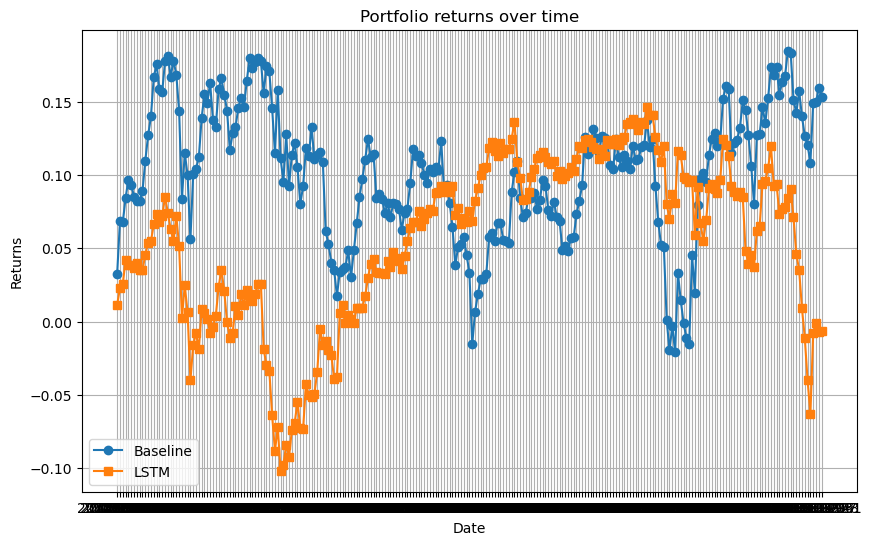

In [71]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(portfolio_returns.index, np.cumsum(portfolio_returns.values), label='Baseline', marker='o')
plt.plot(ml_portfolio_returns.index, np.cumsum(ml_portfolio_returns.values), label='LSTM', marker='s')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.title('Portfolio returns over time')
plt.grid(True)
plt.show()